# Invert using invert Class

In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake 
import os

Reading outline from icepack database


## Constant C0 = 1e-3

### resolution lcar = 5e3

In [2]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 0.01, read_mesh = False, drichlet_ids = [2,3,4], lcar = 5e3)

Reading outline from icepack database


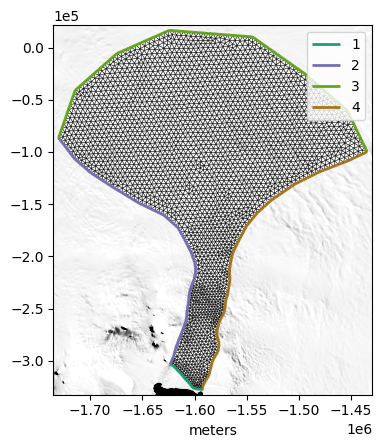

In [3]:
invert_pig.plot_mesh()

#### Simultaneous theta C optimization

In [4]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file
C0 is constant: 0.001


In [5]:
invert_pig.invert_C_theta_simultaneously(max_iterations=300, regularization_grad_fcn= True)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.590920e+08   2.937450e+03                  5.509823e+04   
  1     5.743134e+07   1.085137e+03   5.509823e+04   1.377456e+05   3         2         0         1         3         
  2     8.184175e+06   1.566242e+02   1.377456e+05   1.377456e+05   4         3         0         2         2         
  3     8.184175e+06   1.566242e+02   1.377456e+05   8.609098e+03   5         3         2         2         2         
  4     6.948117e+06   1.314720e+02   8.609098e+03   2.152275e+04   6         4         0         1         3         
  5     4.660296e+06   8.512282e+01   2.152275e+04   5.380686e+04   7         5         0         1         3         
  6     1.781934e+06   3.240931e+01   5.380686e+04   1.345172e+05   8         6         0         2         3         
  7     1.781934e+06   3.240931e+01   1.345172e+05   8.407323e+0

In [6]:
u_optimized = invert_pig.simulation()

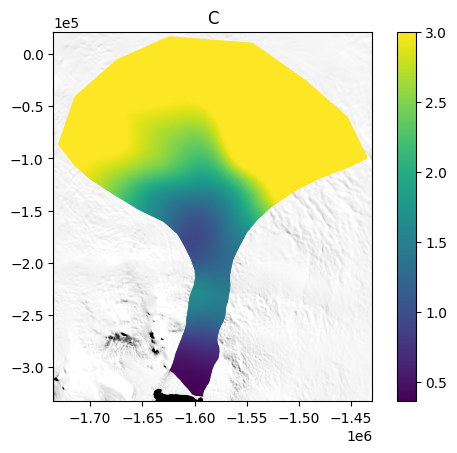

In [7]:
invert_pig.plot_C(vmin = None, vmax = 3)

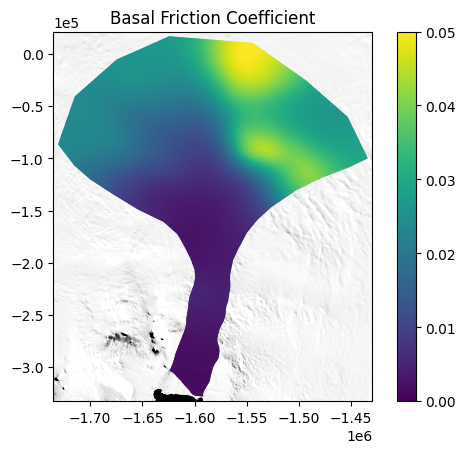

In [8]:
invert_pig.plot_C_total(vmin =0, vmax = 0.05)

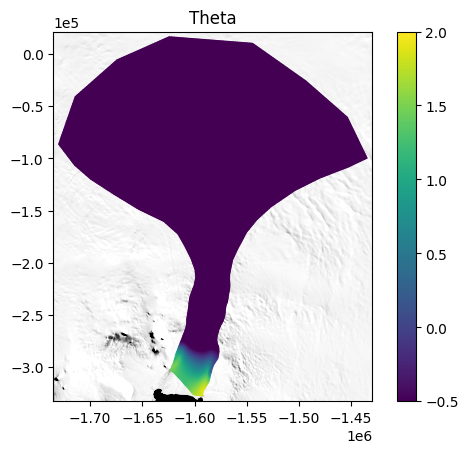

In [9]:
invert_pig.plot_theta(vmin = -0.5, vmax = 2)

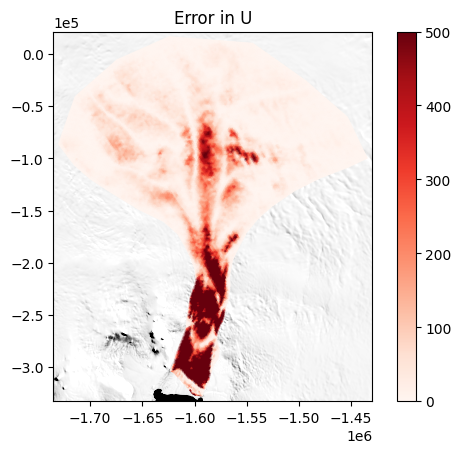

In [10]:
invert_pig.plot_u_error(u_optimized, vmax = 500)

In [11]:
# 426.86530573542706
# 411.3643399240878
# 504.92829587924814 : 150 iterations
# 379.3030080207641 : 300 iterations 
firedrake.assemble(invert_pig.loss_functional(u_optimized))

504.92829587924814

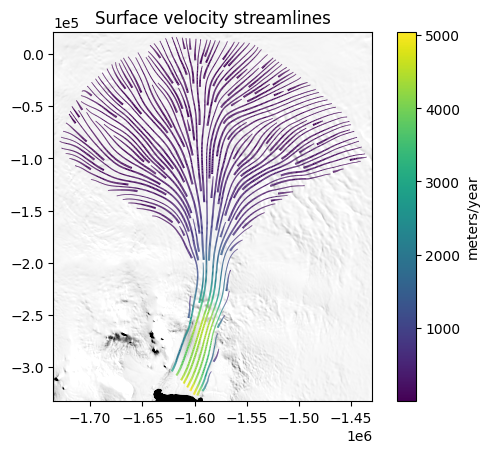

In [12]:
invert_pig.plot_streamline_u(u_optimized)

### resolution lcar = 3.5e3

In [2]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 0.01, read_mesh = False, drichlet_ids = [2,3,4], lcar = 3.5e3)

Reading outline from icepack database


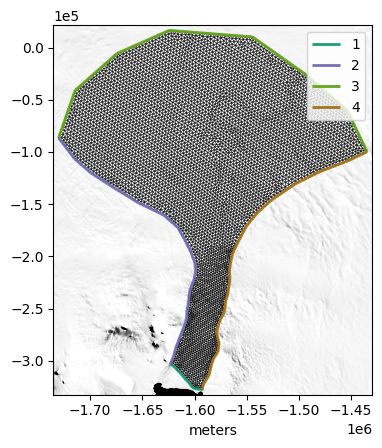

In [3]:
invert_pig.plot_mesh()

In [4]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file
C0 is constant: 0.001


In [5]:
invert_pig.invert_C_theta_simultaneously(max_iterations=300, regularization_grad_fcn= True)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.624205e+08   3.000142e+03                  5.517907e+04   
  1     5.848739e+07   1.105602e+03   5.517907e+04   1.379477e+05   3         2         0         1         3         
  2     8.280710e+06   1.584580e+02   1.379477e+05   1.379477e+05   4         3         0         2         2         
  3     8.280710e+06   1.584580e+02   1.379477e+05   8.621729e+03   5         3         2         2         2         
  4     7.027552e+06   1.331616e+02   8.621729e+03   2.155432e+04   6         4         0         1         3         
  5     4.716956e+06   8.583807e+01   2.155432e+04   5.388581e+04   7         5         0         1         3         
  6     1.819249e+06   3.295695e+01   5.388581e+04   1.347145e+05   8         6         0         1         3         
  7     1.819249e+06   3.295695e+01   1.347145e+05   8.419657e+0

In [6]:
u_optimized = invert_pig.simulation()

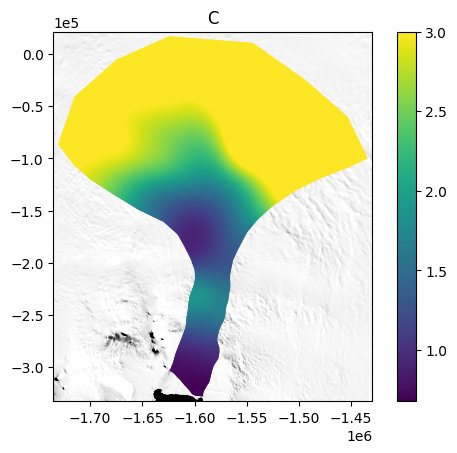

In [7]:
invert_pig.plot_C(vmin = None, vmax = 3)

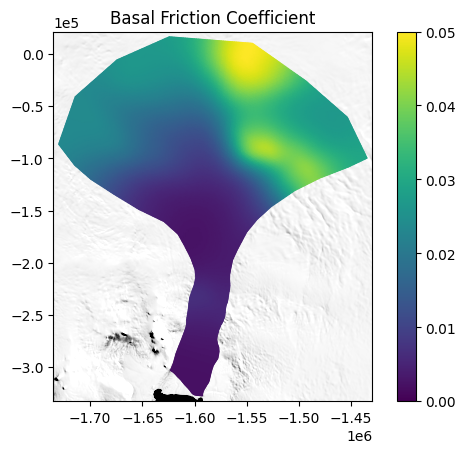

In [8]:
invert_pig.plot_C_total(vmin =0, vmax = 0.05)

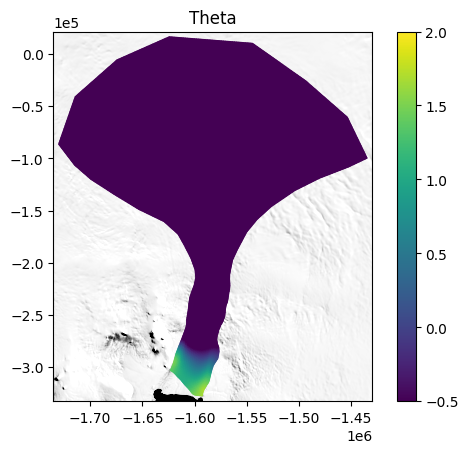

In [9]:
invert_pig.plot_theta(vmin = -0.5, vmax = 2)

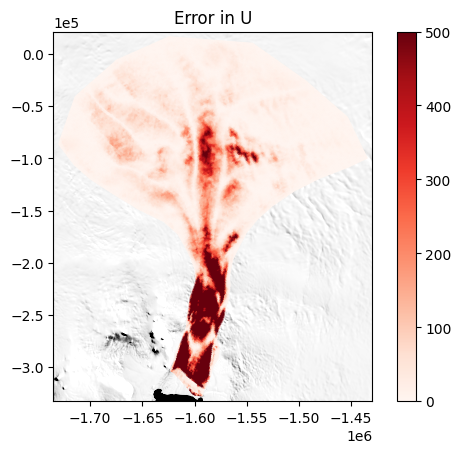

In [10]:
invert_pig.plot_u_error(u_optimized, vmax = 500)

In [11]:
# 367.3261027262398 : 150 iterations
# 367.44506173038315 : 300 iterations
firedrake.assemble(invert_pig.loss_functional(u_optimized))

367.44506173038315

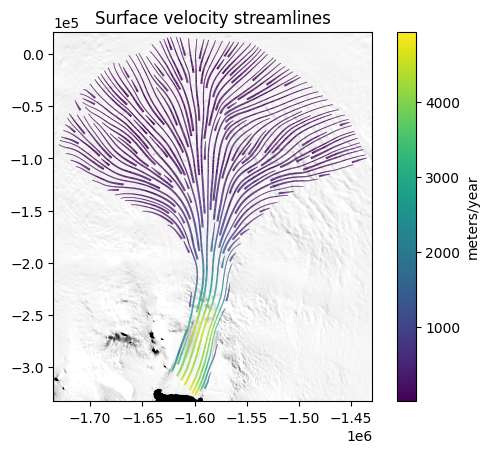

In [12]:
invert_pig.plot_streamline_u(u_optimized)

Save variables

In [12]:
# Save to Checkpoint File
mesh = invert_pig.get_mesh()
theta = invert_pig.get_theta()
C = invert_pig.get_C()
#checkpoint_file_path = os.path.join(folder_path, 'new_reg_variables_c5_t5_simultaneous.h5')
checkpoint_file_path = os.path.join(folder_path, 'regularized_const_C_simultaneous.h5')
with firedrake.CheckpointFile(checkpoint_file_path, 'w') as afile:
    if afile is not None:
        afile.save_mesh(mesh)  # optional
        afile.save_function(u_optimized, name='u_optimized')
        afile.save_function(theta, name='theta')
        afile.save_function(C, name='C')
    else:
        print("Failed to create checkpoint file.")

In [13]:
df = invert_pig.get_dataframe(u_optimized)
df.to_csv('regularized_const_C_simultaneous.csv')

### resolution lcar = 2.5e3

In [2]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 0.01, read_mesh = False, drichlet_ids = [2,3,4], lcar = 2.5e3)

Reading outline from icepack database


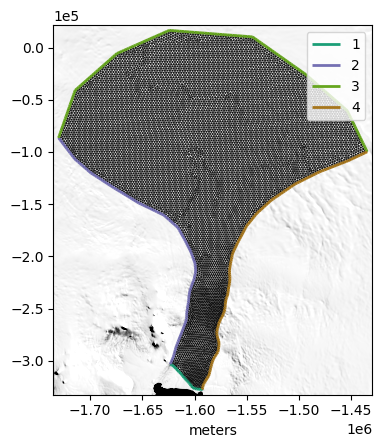

In [3]:
invert_pig.plot_mesh()

In [4]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file
C0 is constant: 0.001


In [5]:
invert_pig.invert_C_theta_simultaneously(max_iterations=300, regularization_grad_fcn= True)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.647698e+08   3.042904e+03                  5.523321e+04   
  1     5.926971e+07   1.120459e+03   5.523321e+04   1.380830e+05   3         2         0         1         3         
  2     8.379763e+06   1.603498e+02   1.380830e+05   1.380830e+05   4         3         0         2         2         
  3     8.379763e+06   1.603498e+02   1.380830e+05   8.630189e+03   5         3         2         2         2         
  4     7.110310e+06   1.347728e+02   8.630189e+03   2.157547e+04   6         4         0         1         3         
  5     4.772348e+06   8.685219e+01   2.157547e+04   5.393868e+04   7         5         0         1         3         
  6     1.839374e+06   3.334341e+01   5.393868e+04   1.348467e+05   8         6         0         1         3         
  7     1.839374e+06   3.334341e+01   1.348467e+05   8.427919e+0

In [6]:
u_optimized = invert_pig.simulation()

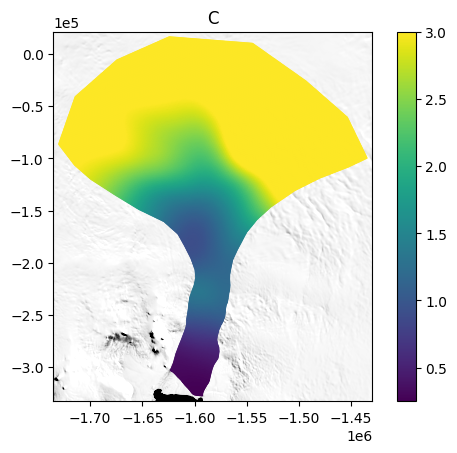

In [7]:
invert_pig.plot_C(vmin = None, vmax = 3)

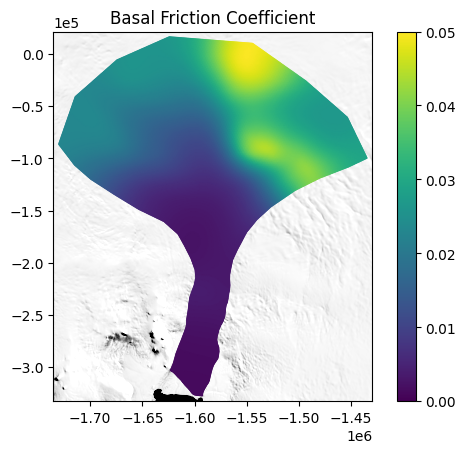

In [8]:
invert_pig.plot_C_total(vmin =0, vmax = 0.05)

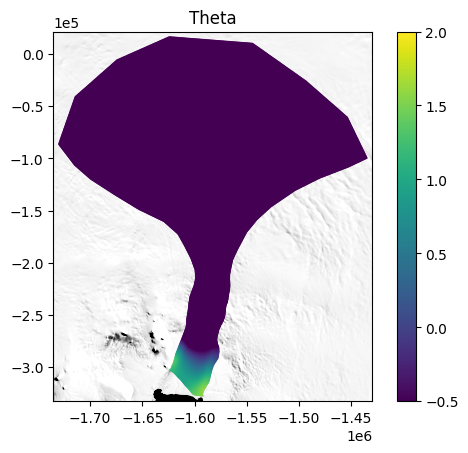

In [9]:
invert_pig.plot_theta(vmin = -0.5, vmax = 2)

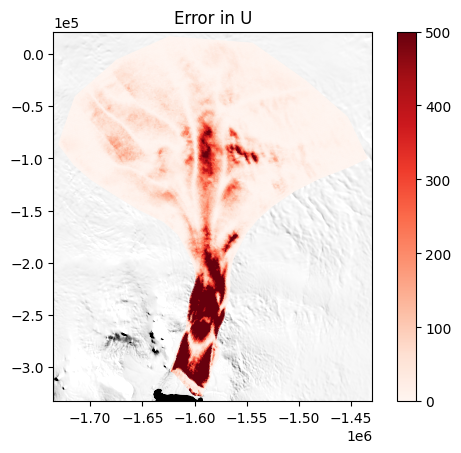

In [10]:
invert_pig.plot_u_error(u_optimized, vmax = 500)

In [11]:
# 317.4592973228489 : 300 iterations
firedrake.assemble(invert_pig.loss_functional(u_optimized))

317.4592973228489

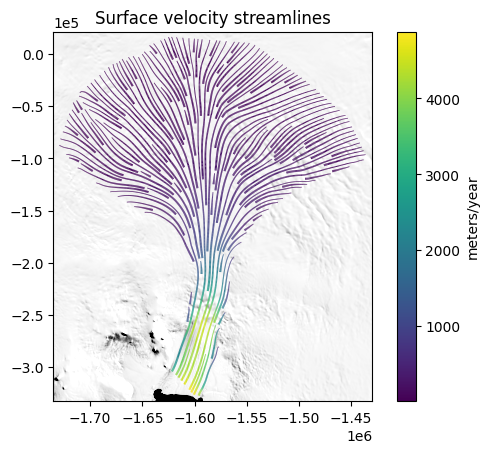

In [12]:
invert_pig.plot_streamline_u(u_optimized)

In [13]:
# Save to Checkpoint File
mesh = invert_pig.get_mesh()
theta = invert_pig.get_theta()
C = invert_pig.get_C()
#checkpoint_file_path = os.path.join(folder_path, 'new_reg_variables_c5_t5_simultaneous.h5')
checkpoint_file_path = os.path.join(folder_path, 'regularized_const_C_simultaneous_finemesh.h5')
with firedrake.CheckpointFile(checkpoint_file_path, 'w') as afile:
    if afile is not None:
        afile.save_mesh(mesh)  # optional
        afile.save_function(u_optimized, name='u_optimized')
        afile.save_function(theta, name='theta')
        afile.save_function(C, name='C')
    else:
        print("Failed to create checkpoint file.")

In [14]:
df = invert_pig.get_dataframe(u_optimized)
df.to_csv('regularized_const_C_simultaneous_finemesh.csv')

## C0 using driving stress, no regularization

### resolution lcar = 5e3

In [3]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 100, read_mesh = False, drichlet_ids = [2,3,4], lcar = 5e3)

Reading outline from icepack database


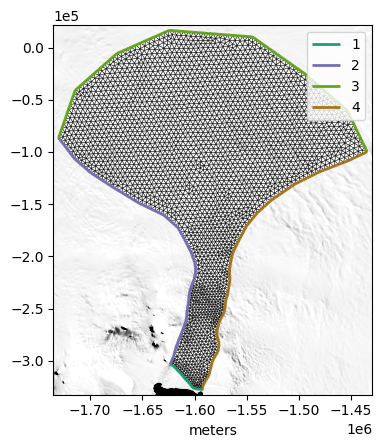

In [4]:
invert_pig.plot_mesh()

In [5]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True, C = 'driving-stress')

Reading velocity from specified file
C0 is computed using driving stress


In [6]:
invert_pig.invert_C_theta_simultaneously(max_iterations=300)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.773805e+05   2.508274e+01                  1.464073e+04   
  1     5.512250e+04   8.796258e+00   1.464073e+04   3.660183e+04   3         2         0         2         2         
  2     5.512250e+04   8.796258e+00   3.660183e+04   2.287614e+03   4         2         2         2         2         
  3     3.654302e+04   7.561368e+00   2.287614e+03   5.719036e+03   5         3         0         1         3         
  4     9.662628e+03   1.709137e+00   5.719036e+03   5.719036e+03   6         4         0         1         3         
  5     3.327683e+03   6.630740e-01   5.719036e+03   1.429759e+04   7         5         0         1         3         
  6     9.098431e+02   7.244460e-02   1.429759e+04   1.429759e+04   8         6         0         2         2         
  7     6.656389e+02   1.187459e-01   1.429759e+04   1.429759e+0

In [7]:
u_optimized = invert_pig.simulation()

In [8]:
firedrake.assemble(invert_pig.loss_functional(u_optimized))

143.58624682639373

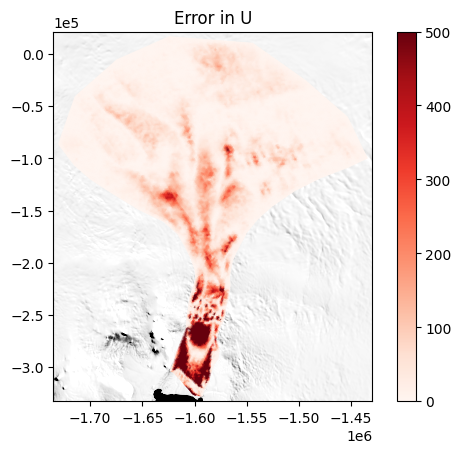

In [12]:
invert_pig.plot_u_error(u_optimized, vmax = 500)

### resolution lcar = 3.5e3

In [13]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 100, read_mesh = False, drichlet_ids = [2,3,4], lcar = 3.5e3)

Reading outline from icepack database


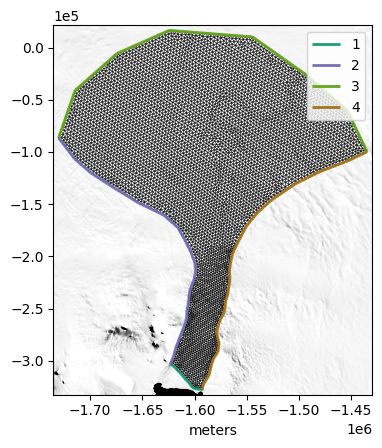

In [14]:
invert_pig.plot_mesh()

In [15]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True, C = 'driving-stress')

Reading velocity from specified file
C0 is computed using driving stress


In [16]:
invert_pig.invert_C_theta_simultaneously(max_iterations=300)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.456904e+05   2.257876e+01                  1.444692e+04   
  1     4.667266e+04   7.933087e+00   1.444692e+04   3.611729e+04   3         2         0         2         2         
  2     4.667266e+04   7.933087e+00   3.611729e+04   2.257331e+03   4         2         2         2         2         
  3     2.997281e+04   6.993861e+00   2.257331e+03   5.643327e+03   5         3         0         1         3         
  4     8.513900e+03   1.861849e+00   5.643327e+03   5.643327e+03   6         4         0         1         3         
  5     2.292569e+03   5.326097e-01   5.643327e+03   1.410832e+04   7         5         0         1         3         
  6     1.032875e+03   1.257061e-01   1.410832e+04   1.410832e+04   8         6         0         3         2         
  7     1.032875e+03   1.257061e-01   1.410832e+04   8.817698e+0

In [17]:
u_optimized = invert_pig.simulation()

In [18]:
firedrake.assemble(invert_pig.loss_functional(u_optimized))

128.39697898434198

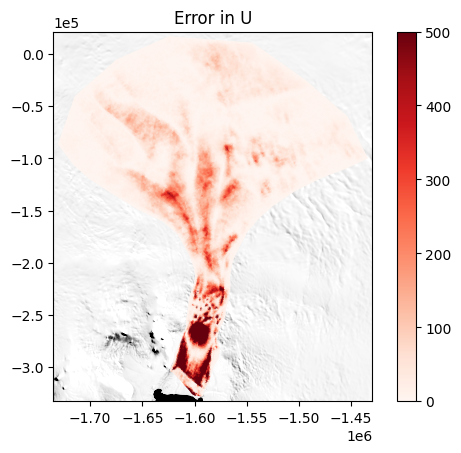

In [19]:
invert_pig.plot_u_error(u_optimized, vmax = 500)